# Probability Distributions Review

In [1]:
import numpy as np
import pandas as pd
import random

from scipy import stats
from math import e, factorial
from env import user, host, password

import matplotlib.pyplot as plt

# Distribution Characteristics

### Uniform Distribution
* Each outcome is discrete
* Each outcome is equally likely
* Example: Rolling a fair die

### Binomial Distribution
* Defined by a number of trials and the probability of success for each trial
* Models the number of successes after a given number of trials
* Each trial is assumed to be independent 
* Example: Number of heads flipped after flipping 5 fair coins

### Normal Distribution
* Defined by a mean and standard deviation
* Models a continuous variable
* the further away from the mean you are the less likely the outcome
* Distribution is bell" shaped
* Example: Most physical measurements such as hight, speed, or strength fall on a normal distribution

### Poisson Distribution
* Defined by an average number of events occuring over a specified amount of time
* Events are assumed to be independant
* Number of events has no upper limit
* This distribution can tell us the likelyhood that a given number of the specified events occur in the specified amount of time
* Example: Number of Emails sent to a server in one day

# Scipy Stats Modules

### Probability Mass Function (discrete) / Probability Density Function (continuous)
* .pmf()
* .pdf()
* Takes in a value
* Returns the probability of randomly choosing that value from the distribution

### Cumulative Density Function
* .cdf()
* Takes in a value
* Returns the probability of randomly choosing that value or lower from the distribution
* Returns the percent of data that is equal to or below that value in the distribution

### Percent Point Function
* .ppf()
* Takes in a percentage  
* Returns a value at which the given percentage of data is below that value in the distribution

### Survival Function 
* .sf()
* Take in a value
* Returns the probability of of randomly choosing a higher value from the distribution
* Returns the percent of data that is higher than that value in the distribution

### Inverse Survival Function
* .isf()
* Takes in a probability
* Returns a value at which the given percentage of data is above that value in the distribution

### 1) A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution.

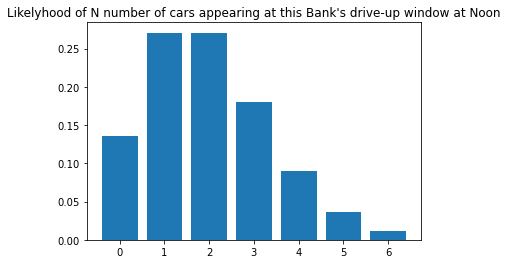

In [2]:
mean = 2

X = [r for r in range(7)]

y = [((e**-mean) * (mean**x)) / (factorial(x)) for x in X]

plt.bar(X,y)
plt.title("Likelyhood of N number of cars appearing at this Bank's drive-up window at Noon")
plt.show()

### a) What is the probability that no cars drive up in the noon hour?

In [3]:
mean = 2
target = 0

In [4]:
stats.poisson(mean).pmf(target)

0.1353352832366127

### Simulation

In [5]:
nrows = 100_000 # set nrows to number of simulations
ncols = 1       # set ncolumns to number of dice rolled in each simulation

# create an nrows by ncols dataframe for the simulation
rolls = np.random.poisson(mean, nrows * ncols).reshape(nrows, ncols) 

df = pd.DataFrame(rolls)
df.head()

,0
0,2
1,1
2,2
3,3
4,2


In [6]:
# add calculation columns
df['zero_cars'] = df[0] == target
df.head()

,0,zero_cars
0,2,False
1,1,False
2,2,False
3,3,False
4,2,False


In [7]:
# get mean of True / False columns 
# format and print results
no_cars = int(round(df.zero_cars.mean(),2) * 100)

print(f"the odds of seeing {target} cars at the bank at noon are {no_cars}%")

the odds of seeing 0 cars at the bank at noon are 13%


### b) What is the probability that 3 or more cars come through the drive through?

In [9]:
mean = 2
target = 3

In [10]:
stats.poisson(mean).sf(target-1)

0.32332358381693654

### Simulation

In [11]:
nrows = 100_000 # set nrows to number of simulations
ncols = 1       # set ncolumns to number of dice rolled in each simulation

# create an nrows by ncols dataframe for the simulation
rolls = np.random.poisson(mean, nrows * ncols).reshape(nrows, ncols) 

df = pd.DataFrame(rolls)
df.head()

# add calculation columns
df['zero_cars'] = df[0] >= target
df.head()

,0,zero_cars
0,2,False
1,2,False
2,2,False
3,1,False
4,2,False


In [12]:
# get mean of True / False columns 
# format and print results
no_cars = int(round(df.zero_cars.mean(),2) * 100)

print(f"the odds of seeing {target} cars at the bank at noon are {no_cars}%")

the odds of seeing 3 cars at the bank at noon are 32%


### c) How likely is it that the drive through gets at least 1 car?

In [13]:
mean = 2
target = 1

In [14]:
stats.poisson(mean).sf(target-1)

0.8646647167633873

### Simulation

In [15]:
nrows = 100_000 # set nrows to number of simulations
ncols = 1       # set ncolumns to number of dice rolled in each simulation

# create an nrows by ncols dataframe for the simulation
rolls = np.random.poisson(mean, nrows * ncols).reshape(nrows, ncols) 

df = pd.DataFrame(rolls)
df.head()

# add calculation columns
df['zero_cars'] = df[0] >= target
df.head()

,0,zero_cars
0,3,True
1,1,True
2,0,False
3,5,True
4,5,True


In [16]:
# get mean of True / False columns 
# format and print results
no_cars = int(round(df.zero_cars.mean(),2) * 100)

print(f"the odds of seeing {target} cars at the bank at noon are {no_cars}%")

the odds of seeing 1 cars at the bank at noon are 87%


### 2) Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3 Calculate the following:

In [17]:
mean = 3
sd = .3

### a) What grade point average is required to be in the top 5% of the graduating class?

In [18]:
stats.norm(mean, sd).ppf(.95)

3.4934560880854417

In [19]:
stats.norm(mean, sd).isf(.05)

3.4934560880854417

### Simulation

In [20]:
nrows = 100_000 # set nrows to number of simulations
ncols = 1       # set ncolumns to number of dice rolled in each simulation

# create an nrows by ncols dataframe for the simulation
rolls = np.random.normal(mean, sd, nrows * ncols).reshape(nrows, ncols) 

df = pd.DataFrame(rolls)

# add calculation columns
df['rank'] = pd.qcut(df[0], q=20, labels=False)
df.head()

,0,rank
0,2.870483,6
1,3.383010,17
2,2.435501,0
3,2.564841,1
4,3.040312,11


In [21]:
df = df[df['rank'] == 19]
df.head()

,0,rank
10,3.601961,19
11,3.556556,19
25,3.511588,19
49,3.610555,19
66,3.625372,19


In [22]:
df[0].min()

3.49380613953135

### b) What GPA constitutes the bottom 15% of the class?

In [23]:
stats.norm(mean, sd).ppf(.15)

2.689069983151863

In [ ]:
nrows = 100_000 # set nrows to number of simulations
ncols = 1       # set ncolumns to number of dice rolled in each simulation

# create an nrows by ncols dataframe for the simulation
rolls = np.random.poisson(mean, nrows * ncols).reshape(nrows, ncols) 

df = pd.DataFrame(rolls)
df.head()

# add calculation columns
df['zero_cars'] = df[0] >= target
df.head()

In [ ]:
stats.norm(mean, sd).isf(.85)

### Simulation

In [24]:
nrows = 100_000 # set nrows to number of simulations
ncols = 1       # set ncolumns to number of dice rolled in each simulation

# create an nrows by ncols dataframe for the simulation
rolls = np.random.normal(mean, sd, nrows * ncols).reshape(nrows, ncols) 

df = pd.DataFrame(rolls)

# add calculation columns
df['rank'] = pd.qcut(df[0], q=20, labels=False)

df = df[df['rank'] == 2]

df[0].max()

2.690728143906401

### c)An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. 

In [ ]:
# .2 to .3 Third decile 
# .1 to .2
# .0 to .1

In [25]:
start = stats.norm(mean, sd).ppf(.20)
start

2.7475136299281258

In [26]:
end = stats.norm(mean, sd).ppf(.30)
end

2.842679846187588

In [27]:
print(f"The range of the third decile is from {round(start,2)} to {round(end,2)}.")

The range of the third decile is from 2.75 to 2.84.


### Simulation

In [28]:
nrows = 100_000 # set nrows to number of simulations
ncols = 1       # set ncolumns to number of dice rolled in each simulation

# create an nrows by ncols dataframe for the simulation
rolls = np.random.normal(mean, sd, nrows * ncols).reshape(nrows, ncols) 

df = pd.DataFrame(rolls)

# add calculation columns
df['rank'] = pd.qcut(df[0], q=10, labels=False)

df = df[df['rank'] == 2]

df[0].min()

2.746529847634203

In [29]:
df[0].max()

2.8412226171241413

### d)Would a student with a 2.8 grade point average qualify for this scholarship?

Yes

### e)If I have a GPA of 3.5, what percentile am I in?

In [30]:
stats.norm(mean, sd).cdf(3.5)

0.9522096477271853

In [31]:
percentile = int(round(stats.norm(mean, sd).cdf(3.5),2) * 100)

print(f"You are in the {percentile}th percentile!")

You are in the 95th percentile!


### Simulation

In [32]:
nrows = 100_000 # set nrows to number of simulations
ncols = 1       # set ncolumns to number of dice rolled in each simulation

# create an nrows by ncols dataframe for the simulation
rolls = np.random.normal(mean, sd, nrows * ncols).reshape(nrows, ncols) 

df = pd.DataFrame(rolls)

# amount of data over with scores > 3.5 divided by all the data 
len(df[df[0] < 3.5]) / len(df)

0.951

### 3) A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [33]:
prob_success = .02
n_trials = 4326

target_successes = 97

stats.binom(n_trials, prob_success).sf(target_successes-1)

0.1397582363130086

### Simulation

In [34]:
nrows = 100_000 # set nrows to number of simulations
ncols = 1    # set ncolumns to number of dice rolled in each simulation

# create an nrows by ncols dataframe for the simulation
rolls = np.random.binomial(n_trials, prob_success, nrows * ncols).reshape(nrows, ncols) 

df = pd.DataFrame(rolls)

# add calculated columns
df['97ish'] = df[0] >= 97
df.head()

,0,97ish
0,82,False
1,96,False
2,96,False
3,80,False
4,87,False


In [35]:
# get the mean of the True / False column
df['97ish'].mean()

0.14

### 4) You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.What is the probability that at least one of your first 60 answers is correct?

In [36]:
prob_success = .01
n_trials = 60
desired_successes = 1

stats.binom(n_trials, prob_success).sf(desired_successes-1)

0.4528433576092388

### Simmulation

In [37]:
nrows = 100_000 # set nrows to number of simulations
ncols = 60    # set ncolumns to number of dice rolled in each simulation

# create an array with nrows by ncols dataframe for the simulation
rolls = np.random.choice([True, False], nrows * ncols, p=[.01,.99]).reshape(nrows, ncols) 

# convert to data frame
df = pd.DataFrame(rolls)

df["correct"] = df.sum(axis=1) > 0
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,correct
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [38]:
df["correct"].mean()

0.45389

### 5) The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 

### How likely is it that the break area gets cleaned up each day? 

In [39]:
prob_success = .03
n_trials = (22 * 3) * .9

desired_successes = 1

stats.binom(n_trials, prob_success).sf(desired_successes-1)

0.8342199288437355

### Simmulation

In [40]:
nrows = 100_000 # set nrows to number of simulations
ncols = 1    # set ncolumns to number of dice rolled in each simulation

# create an array with nrows by ncols dataframe for the simulation
rolls = np.random.binomial(n_trials, prob_success, nrows * ncols).reshape(nrows, ncols) 

# convert to data frame
df = pd.DataFrame(rolls)

df["Clean"] = df.sum(axis=1) > 0
df.head()

,0,Clean
0,1,True
1,1,True
2,3,True
3,1,True
4,1,True


In [41]:
df["Clean"].mean()

0.83441

### How likely is it that it goes two days without getting cleaned up? 

In [42]:
# one day without cleaning

1-stats.binom(n_trials, prob_success).sf(desired_successes-1)

0.16578007115626447

In [43]:
# odds of not being cleaned for two days in a row

(1-stats.binom(n_trials, prob_success).sf(desired_successes-1))**2

0.027483031992576113

### Simulation

In [44]:
nrows = 100_000 # set nrows to number of simulations
ncols = 2    # set ncolumns to number of dice rolled in each simulation

# create an array with nrows by ncols dataframe for the simulation
rolls = np.random.binomial(n_trials, prob_success, nrows * ncols).reshape(nrows, ncols) 

# convert to data frame
df = pd.DataFrame(rolls)

df["dirty"] = df.sum(axis=1) == 0
df.head()

,0,1,dirty
0,0,1,False
1,1,2,False
2,1,3,False
3,0,6,False
4,1,1,False


In [45]:
df["dirty"].mean()

0.02745

### All week?

In [46]:
(1-stats.binom(n_trials, prob_success).sf(desired_successes-1))**5

0.0001252165138809122

### Simmulation

In [47]:
nrows = 100_000 # set nrows to number of simulations
ncols = 5    # set ncolumns to number of dice rolled in each simulation

# create an array with nrows by ncols dataframe for the simulation
rolls = np.random.binomial(n_trials, prob_success, nrows * ncols).reshape(nrows, ncols) 

# convert to data frame
df = pd.DataFrame(rolls)

df["dirty"] = df.sum(axis=1) == 0
df.head()

,0,1,2,3,4,dirty
0,1,1,1,1,1,False
1,3,1,0,3,0,False
2,1,1,2,1,3,False
3,3,3,1,3,1,False
4,1,1,1,5,6,False


In [48]:
df["dirty"].mean()

0.0001

### 6) You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [49]:
# get information from the problem
# normal distribution
mean_customers_in_line = 15
sd_customers_in_line = 3

time_per_order = 2

time_to_get_food = 10
time_to_eat_food = 15

total_time = 60

In [50]:
# get time I can spend in line
max_time_in_line = total_time - time_to_get_food - time_to_eat_food
max_time_in_line

35

In [51]:
# calculate total number of customers I can wait for in that time
max_customers_in_line = max_time_in_line / time_per_order
max_customers_in_line

17.5

In [52]:
# get odds of max_customers_in_line or less customers
stats.norm(mean_customers_in_line, sd_customers_in_line).cdf(max_customers_in_line)

0.7976716190363569

### Simulation

In [53]:
nrows = 100_000 # set nrows to number of simulations
ncols = 1       # set ncolumns to number of dice rolled in each simulation

# create an array with nrows by ncols dataframe for the simulation
rolls = np.random.normal(mean_customers_in_line, sd_customers_in_line, nrows * ncols).reshape(nrows, ncols) 

# convert to data frame
df = pd.DataFrame(rolls)

df["can_wait"] = df.sum(axis=1) <= 17.5
df.head()

,0,can_wait
0,8.611871,True
1,13.590390,True
2,11.072505,True
3,19.270677,False
4,14.175508,True


In [54]:
df["can_wait"].mean()

0.7976

### 7) Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [55]:
def get_data_from_sql(user, host, password, database, query):
    '''
    take in user, host, password, 
    database and query
    Access sql database
    return a pandas dataframe of the query results   
    '''
    
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
        
    return pd.read_sql(query, url)

In [56]:
database = 'employees'

query = """

SELECT salary
FROM salaries

where salaries.to_date = "9999-01-01"

"""

df = get_data_from_sql(user, host, password, database, query)

In [57]:
df.head()

,salary
0,88958
1,72527
2,43311
3,74057
4,94692


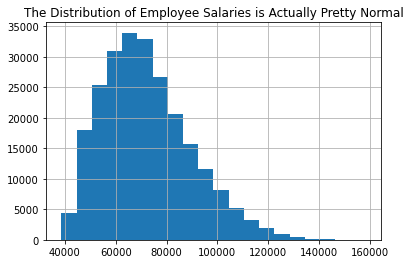

In [58]:
df.salary.hist(bins=20)
plt.title("The Distribution of Employee Salaries is Actually Pretty Normal")
plt.show()

In [59]:
df.describe()

,salary
count,240124.000000
mean,72012.235857
std,17309.995380
min,38623.000000
25%,59048.750000
50%,69805.000000
75%,82546.000000
max,158220.000000


### Average Salary

In [60]:
mean_salary = round(df.salary.mean(),0)
mean_salary

72012.0

### Standard Deviation

In [61]:
sd_salary = round(df.salary.agg(np.std),0)
sd_salary

17310.0

### a) What percent of employees earn less than 60,000?

In [62]:
stats.norm(mean_salary, sd_salary).cdf(60_000)

0.2438617554963023

In [63]:
len(df[df.salary < 60_000]) / len(df)

0.2705727041028802

### b) What percent of employees earn more than 95,000?

In [64]:
stats.norm(mean_salary, sd_salary).sf(95_000)

0.09208599994106093

In [65]:
len(df[df.salary > 95_000]) / len(df)

0.1086272092752078

### c) What percent of employees earn between 65,000 and 80,000?

In [66]:
# percent of employees making 65,000 or more

stats.norm(mean_salary, sd_salary).cdf(65_000)

0.34270796927478153

In [67]:
# percent of employees making 80,000 or less
stats.norm(mean_salary, sd_salary).cdf(80_000)

0.6777683330941655

In [72]:
# subtract the percent of employees making 65,000 from the percent of employees making 80,000 or less
# to get the percent of people making between 65,000 and 80,000
stats.norm(mean_salary, sd_salary).cdf(80_000) - stats.norm(mean_salary, sd_salary).cdf(65_000)

0.335060363819384

### Simulation

In [69]:
len(df[df.salary < 65_000]) / len(df)

0.38421815395379055

In [70]:
len(df[df.salary < 80_000]) / len(df)

0.7093626626243108

In [71]:
(len(df[df.salary < 80_000]) / len(df)) - (len(df[df.salary < 65_000]) / len(df))

0.32514450867052025

### d) What do the top 5% of employees make?

In [73]:
stats.norm(mean_salary, sd_salary).isf(.05)

100484.41628253

### Simulation

In [75]:
# add calculation columns
df['rank'] = pd.qcut(df['salary'], q=20, labels=False)

df = df[df['rank'] == 19]
df.head()

,salary,rank
55,113229,19
119,109501,19
138,109964,19
148,104747,19
187,104656,19


In [76]:
df['salary'].min()

104226